## **Custom Layer**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
# define custom class 
class MyLayer(tf.keras.layers.Layer):

  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim 
    super(MyLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    self.W = self.add_weight(
          name = 'kernel',
          shape = (input_shape[1], self.output_dim),
          initializer = 'uniform',
          trainable = True)
    
    self.built = True

  
  def call(self, x):
    return tf.matmul(x, self.W)

  def compute_output_shape(self, input_shape):
    return (input_shape[0], self.output_dim)

In [ ]:
# define model containing custom layer 
model = tf.keras.Sequential([tf.keras.layers.Dense(256, input_shape=(784,)), tf.keras.layers.Dense(256, activation='relu'), MyLayer(10), tf.keras.layers.Dense(10, activation='softmax')])

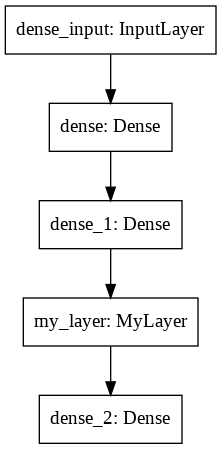

In [ ]:
plot_model(model)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# preprocessing 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test_samples')

60000 train samples
10000 test_samples


In [ ]:
# treat categorical columns
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# compile
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# train 
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.5717 - accuracy: 0.8242 - val_loss: 0.1743 - val_accuracy: 0.9463
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1536 - accuracy: 0.9543 - val_loss: 0.1360 - val_accuracy: 0.9600
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1037 - accuracy: 0.9680 - val_loss: 0.1063 - val_accuracy: 0.9675
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0803 - accuracy: 0.9751 - val_loss: 0.1014 - val_accuracy: 0.9709
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.0957 - val_accuracy: 0.9718
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.1019 - val_accuracy: 0.9726
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0812 - val_accuracy: 0.9777
Epoch 

# **Image Classification**

In [1]:
import tensorflow as tf

In [2]:
# See what datasets are avaialable 
import tensorflow_datasets as tfds
print("Number of datasets: ", len(tfds.list_builders()))

Number of datasets:  224


In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [4]:
# Load the training/testing datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
# Check how many data points are loaded

print("X_train dimensions : ", X_train.shape)
print("X_train dimensions : ", X_test.shape)
print("X_train dimensions : ", y_train.shape)
print("X_train dimensions : ", y_test.shape)

X_train dimensions :  (50000, 32, 32, 3)
X_train dimensions :  (10000, 32, 32, 3)
X_train dimensions :  (50000, 1)
X_train dimensions :  (10000, 1)


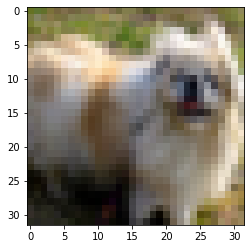

In [6]:
# Printe on sampel data point
import matplotlib.pyplot as plt 
plt.imshow(X_train[40])


In [7]:
# Splitting training data into train and validation sets
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=0)

In [8]:
# Image augmentation with keras image generator class 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(rotation_range = 15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,)

In [9]:
# Function for scaling data 
def normalize(data):
  data = data.astype("float32")
  data = data/255.0
  return data

In [10]:
# Scale and augment train/test datasets
X_train = normalize(X_train)
datagen.fit(X_train)
X_val = normalize(X_val)
datagen.fit(X_val)
X_test = normalize(X_test)


In [11]:
# Treat categorical columns
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

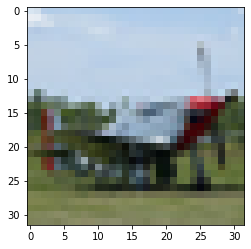

In [12]:
# Display the modified image for fun 
plt.imshow(X_train[40])

In [13]:
# print the dimensions after the data preprocessing

print("X_train dimensions : ", X_train.shape)
print("y_train dimensions : ", y_train.shape)
print("X_test dimensions : ", X_test.shape)
print("y_test dimensions : ", y_test.shape)
print("X_val dimensions : ", X_val.shape)
print("y_val dimensions : ", y_val.shape)

X_train dimensions :  (47500, 32, 32, 3)
y_train dimensions :  (47500, 10)
X_test dimensions :  (10000, 32, 32, 3)
y_test dimensions :  (10000, 10)
X_val dimensions :  (2500, 32, 32, 3)
y_val dimensions :  (2500, 10)


In [14]:
# Train, evaluate and prints metrics 
def results(model):
  epoch = 20
  r = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=epoch, steps_per_epoch=len(X_train)/32, validation_data=(X_val, y_val), verbose=1)
  acc = model.evaluate(X_test, y_test)
  print("test set loss", acc[0])
  print("test set accuracy", acc[1] * 100)

  # Plot training and validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training and validation loss values
  plt.plot(epoch_range, r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()
  

In [15]:
# Predict the class in a given image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set up class names array 
classes = ['airplane' ,'automobile', 'bird' , 'cat' , 'deer' ,'dog' ,'frog', 'horse' ,'ship' ,'truck']

def predict_class(filename, model):

  # load and display image
  img = load_img(filename, target_size=(32, 32))
  plt.imshow(img)

  # convert to array
  # reshape into a single sample with 3 channels
  img = img_to_array(img)
  img = img.reshape(1, 32, 32, 3)

  # prepare pixel data 
  img = img.astype('float32')
  img = img/255.0

  # predicting the results
  result = model.predict(img)
  print("result {} ".format(result))

  # copy predictions to dictionary
  dict2 = {}
  for i in range(10):
    dict2[result[0][i]] = classes[i]
  print("dict2 {}".format(dict2))

  # sort on predictions
  res = result[0]
  res.sort()
  print("res {}".format(res))

  # pick up top 3 predictions
  res = res[::-1]
  print("res {}".format(res))
  results = res[:3]
  print("results {}".format(results))

  print("Top predictions of these images are")
  for i in range(3):
    print("{} : {}".format(dict2[results[i]], (results[i]*100).round(2)))

  print("The image given as input is")




## First Model : Simple model with 2 convolution layers

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization 

# define model 
model_1 = Sequential([
              
              Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (32, 32, 3)),
              Conv2D(32, (3, 3), activation='relu', padding='same'),
              MaxPooling2D((2, 2 )),
              Flatten(),
              Dense(128, activation='relu'),
              Dense(10, activation='softmax')
])

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
______________________________________________

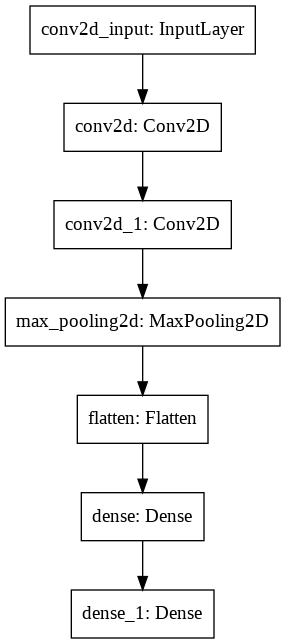

In [18]:
# network plot
from tensorflow.keras.utils import plot_model 
plot_model(model_1, to_file = 'model1.png')

In [19]:
# compile 
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.09)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/20
1484/1484 [==============================] - 30s 16ms/step - loss: 2.2742 - accuracy: 0.1525 - val_loss: 2.1041 - val_accuracy: 0.2732
Epoch 2/20
1484/1484 [==============================] - 23s 16ms/step - loss: 2.0567 - accuracy: 0.2730 - val_loss: 1.9094 - val_accuracy: 0.3348
Epoch 3/20
1484/1484 [==============================] - 23s 15ms/step - loss: 1.9377 - accuracy: 0.3177 - val_loss: 1.8429 - val_accuracy: 0.3424
Epoch 4/20
1484/1484 [==============================] - 23s 15ms/step - loss: 1.8709 - accuracy: 0.3472 - val_loss: 1.7953 - val_accuracy: 0.3648
Epoch 5/20
1484/1484 [==============================] - 23s 15ms/step - loss: 1.8266 - accuracy: 0.3518 - val_loss: 1.7312 - val_accuracy: 0.3968
Epoch 6/20
1484/1484 [==============================] - 23s 16ms/step - loss: 1.7859 - accuracy: 0.3719 - val_loss: 1.6848 - val_accuracy: 0.4120
Epoch 7/20
1484/1484 [==============================] - 23s 15ms/step - loss: 1.7464 - accuracy: 0.3815 - val_loss: 1.6577 -

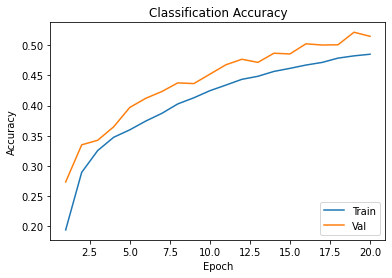

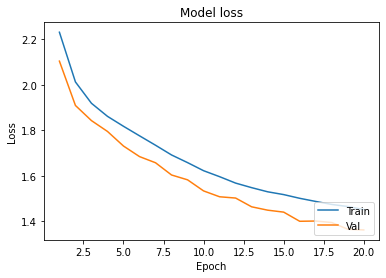

In [20]:
# train, evaluate and display metrics
results(model_1)

result [[0.6316643  0.16208725 0.00279528 0.00264207 0.00207723 0.0011679
  0.00526737 0.00489599 0.14735238 0.04005028]] 
dict2 {0.6316643: 'airplane', 0.16208725: 'automobile', 0.0027952848: 'bird', 0.0026420716: 'cat', 0.0020772258: 'deer', 0.0011678981: 'dog', 0.0052673686: 'frog', 0.00489599: 'horse', 0.14735238: 'ship', 0.040050276: 'truck'}
res [0.0011679  0.00207723 0.00264207 0.00279528 0.00489599 0.00526737
 0.04005028 0.14735238 0.16208725 0.6316643 ]
res [0.6316643  0.16208725 0.14735238 0.04005028 0.00526737 0.00489599
 0.00279528 0.00264207 0.00207723 0.0011679 ]
results [0.6316643  0.16208725 0.14735238]
Top predictions of these images are
airplane : 63.17
automobile : 16.21
ship : 14.74
The image given as input is


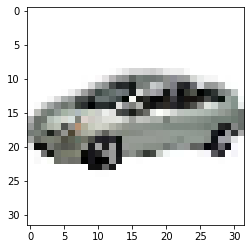

In [22]:
# predict on unseen image
import urllib
resource = "/content/unknown02.png"

predict_class(resource, model_1)

## Second Model : with 4 Convolution layers


In [54]:
# define model 
model_2 = Sequential([
          
      Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
      Conv2D(32, (3, 3), activation='relu', padding='same'), 
      MaxPooling2D((2, 2)), 
      Conv2D(64, (3, 3), activation='relu', padding='same'), 
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(10, activation='softmax')

])

In [55]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)             

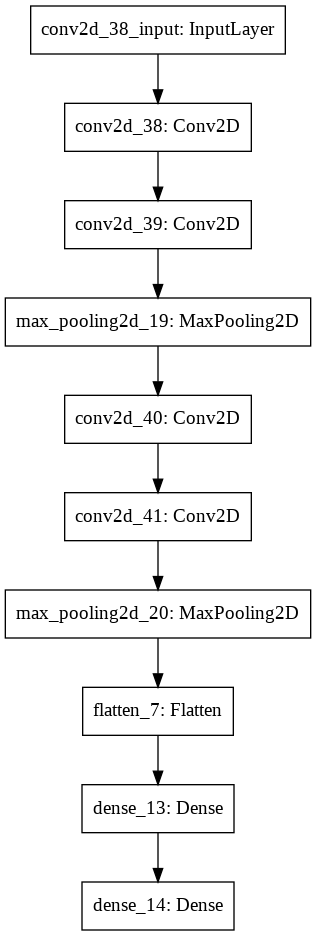

In [56]:
plot_model(model_2, to_file='model2.png')

In [57]:
# compile
opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/20
1484/1484 [==============================] - 24s 16ms/step - loss: 2.0950 - accuracy: 0.2254 - val_loss: 1.6528 - val_accuracy: 0.4096
Epoch 2/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.6807 - accuracy: 0.3994 - val_loss: 1.4043 - val_accuracy: 0.4940
Epoch 3/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.5065 - accuracy: 0.4551 - val_loss: 1.3043 - val_accuracy: 0.5276
Epoch 4/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.3908 - accuracy: 0.4990 - val_loss: 1.3365 - val_accuracy: 0.5264
Epoch 5/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.3214 - accuracy: 0.5283 - val_loss: 1.1839 - val_accuracy: 0.5820
Epoch 6/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.2410 - accuracy: 0.5561 - val_loss: 1.0945 - val_accuracy: 0.6028
Epoch 7/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.1734 - accuracy: 0.5792 - val_loss: 1.0466 -

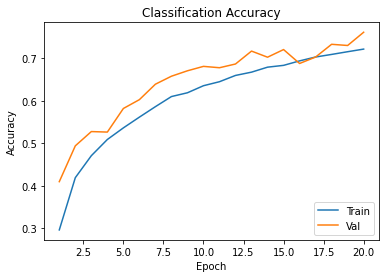

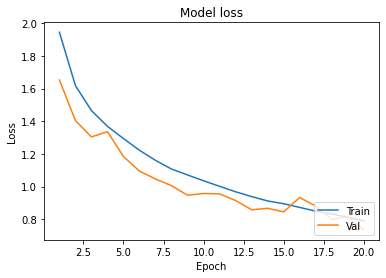

In [58]:
# train, evaluate and display metrics
results(model_2)

result [[8.4811395e-01 3.6851192e-04 2.3616675e-02 1.9831724e-02 8.4795520e-02
  9.0096164e-03 1.4855373e-03 5.1265722e-03 7.3884791e-03 2.6329892e-04]] 
dict2 {0.84811395: 'airplane', 0.00036851192: 'automobile', 0.023616675: 'bird', 0.019831724: 'cat', 0.08479552: 'deer', 0.009009616: 'dog', 0.0014855373: 'frog', 0.005126572: 'horse', 0.007388479: 'ship', 0.00026329892: 'truck'}
res [2.6329892e-04 3.6851192e-04 1.4855373e-03 5.1265722e-03 7.3884791e-03
 9.0096164e-03 1.9831724e-02 2.3616675e-02 8.4795520e-02 8.4811395e-01]
res [8.4811395e-01 8.4795520e-02 2.3616675e-02 1.9831724e-02 9.0096164e-03
 7.3884791e-03 5.1265722e-03 1.4855373e-03 3.6851192e-04 2.6329892e-04]
results [0.84811395 0.08479552 0.02361668]
Top predictions of these images are
airplane : 84.81
deer : 8.48
bird : 2.36
The image given as input is


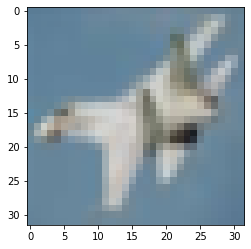

In [59]:
# predict on earlier load image 
predict_class("/content/test01.png", model_2)

# Third Model : 6 convolution layers with 32 , 64 and 128 filters respectively

In [23]:
model_3 = Sequential([
                      
          Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
          Conv2D(32, (3, 3), activation='relu', padding='same'),
          MaxPooling2D((2, 2)),
          Conv2D(64, (3, 3), activation='relu', padding='same'),
          Conv2D(64, (3, 3), activation='relu', padding='same'),
          MaxPooling2D((2, 2)),
          Conv2D(128, (3, 3), activation='relu', padding='same'),
          Conv2D(128, (3, 3), activation='relu', padding='same'),
          MaxPooling2D((2, 2)),
          Flatten(),
          Dense(128, activation='relu'),
          Dense(10, activation='softmax'),


])

In [25]:
# Compile the model 
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

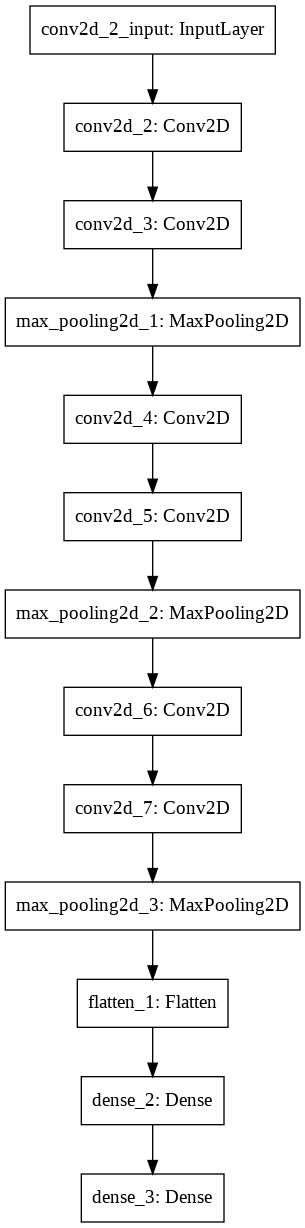

In [27]:
plot_model(model_3, to_file='model3.png')

Epoch 1/20
1484/1484 [==============================] - 25s 17ms/step - loss: 2.2369 - accuracy: 0.1590 - val_loss: 1.8953 - val_accuracy: 0.3152
Epoch 2/20
1484/1484 [==============================] - 25s 17ms/step - loss: 1.8655 - accuracy: 0.3273 - val_loss: 1.6265 - val_accuracy: 0.4172
Epoch 3/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.6259 - accuracy: 0.4148 - val_loss: 1.4268 - val_accuracy: 0.4908
Epoch 4/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.4950 - accuracy: 0.4605 - val_loss: 1.3023 - val_accuracy: 0.5364
Epoch 5/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.3972 - accuracy: 0.4993 - val_loss: 1.2544 - val_accuracy: 0.5608
Epoch 6/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.3083 - accuracy: 0.5310 - val_loss: 1.1133 - val_accuracy: 0.6024
Epoch 7/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.2266 - accuracy: 0.5613 - val_loss: 1.0640 -

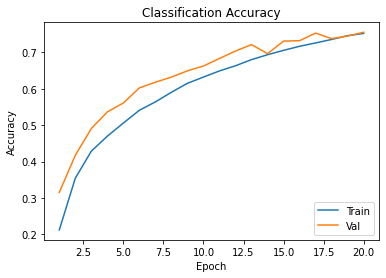

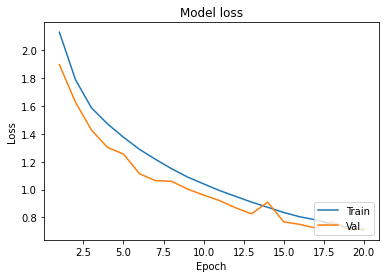

In [28]:
results(model_3)

result [[8.31021190e-01 4.36256261e-04 8.70070681e-02 4.73876484e-03
  6.03493638e-02 3.46210133e-03 3.46452696e-04 4.36987262e-03
  8.15337244e-03 1.15548944e-04]] 
dict2 {0.8310212: 'airplane', 0.00043625626: 'automobile', 0.08700707: 'bird', 0.004738765: 'cat', 0.060349364: 'deer', 0.0034621013: 'dog', 0.0003464527: 'frog', 0.0043698726: 'horse', 0.008153372: 'ship', 0.000115548944: 'truck'}
res [1.15548944e-04 3.46452696e-04 4.36256261e-04 3.46210133e-03
 4.36987262e-03 4.73876484e-03 8.15337244e-03 6.03493638e-02
 8.70070681e-02 8.31021190e-01]
res [8.31021190e-01 8.70070681e-02 6.03493638e-02 8.15337244e-03
 4.73876484e-03 4.36987262e-03 3.46210133e-03 4.36256261e-04
 3.46452696e-04 1.15548944e-04]
results [0.8310212  0.08700707 0.06034936]
Top predictions of these images are
airplane : 83.1
bird : 8.7
deer : 6.03
The image given as input is


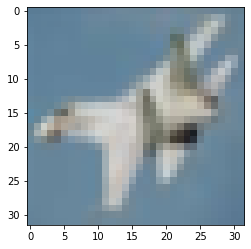

In [29]:
# predict on earlier load image 
predict_class("/content/test01.png", model_3)

# Model 4 : Adding Dropouts

In [30]:
model_4 = Sequential([
          
          Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
          Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          MaxPooling2D((2, 2)),
          Dropout(0.2),
          Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          MaxPooling2D((2, 2)),
          Dropout(0.2),
          Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
          MaxPooling2D((2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(128, activation='relu'),
          Dense(10, activation='softmax'),  
])

In [31]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

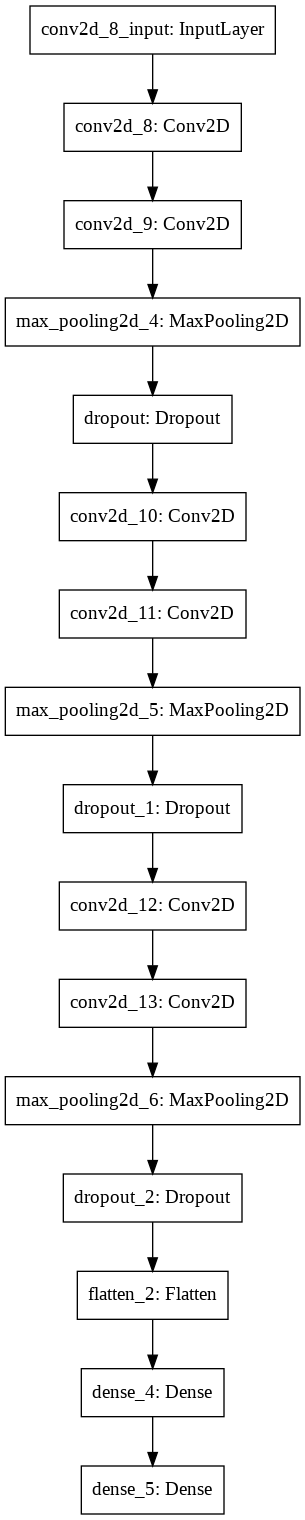

In [32]:
plot_model(model_4, to_file='model4.png')

In [34]:
opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_4.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/20
1484/1484 [==============================] - 25s 17ms/step - loss: 2.0799 - accuracy: 0.2288 - val_loss: 1.5562 - val_accuracy: 0.4324
Epoch 2/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.6315 - accuracy: 0.3951 - val_loss: 1.4379 - val_accuracy: 0.4752
Epoch 3/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.4833 - accuracy: 0.4591 - val_loss: 1.2847 - val_accuracy: 0.5356
Epoch 4/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.3749 - accuracy: 0.5039 - val_loss: 1.2554 - val_accuracy: 0.5468
Epoch 5/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.2778 - accuracy: 0.5376 - val_loss: 1.0955 - val_accuracy: 0.6064
Epoch 6/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.2117 - accuracy: 0.5658 - val_loss: 1.0545 - val_accuracy: 0.6216
Epoch 7/20
1484/1484 [==============================] - 24s 16ms/step - loss: 1.1505 - accuracy: 0.5857 - val_loss: 0.9956 -

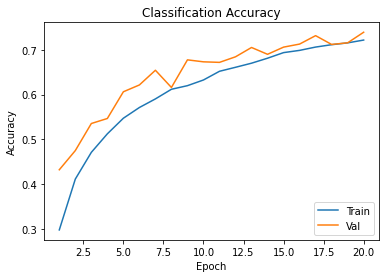

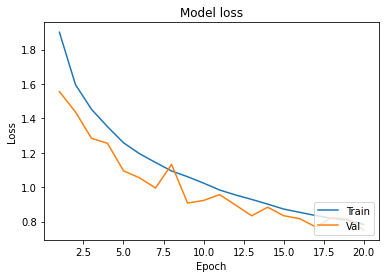

In [35]:
results(model_4)

result [[6.7792749e-01 3.8632241e-04 3.4493513e-02 2.6017323e-02 1.4852804e-01
  6.1117250e-02 1.1053946e-02 1.0816773e-02 2.9273650e-02 3.8574188e-04]] 
dict2 {0.6779275: 'airplane', 0.0003863224: 'automobile', 0.034493513: 'bird', 0.026017323: 'cat', 0.14852804: 'deer', 0.06111725: 'dog', 0.011053946: 'frog', 0.010816773: 'horse', 0.02927365: 'ship', 0.00038574188: 'truck'}
res [3.8574188e-04 3.8632241e-04 1.0816773e-02 1.1053946e-02 2.6017323e-02
 2.9273650e-02 3.4493513e-02 6.1117250e-02 1.4852804e-01 6.7792749e-01]
res [6.7792749e-01 1.4852804e-01 6.1117250e-02 3.4493513e-02 2.9273650e-02
 2.6017323e-02 1.1053946e-02 1.0816773e-02 3.8632241e-04 3.8574188e-04]
results [0.6779275  0.14852804 0.06111725]
Top predictions of these images are
airplane : 67.79
deer : 14.85
dog : 6.11
The image given as input is


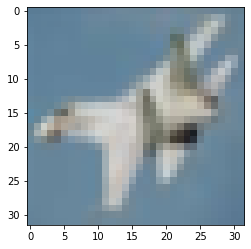

In [36]:
predict_class("test01.png" ,model_4)

# Model 5 : Adding Batch Normalization and Regularization

In [41]:
weight_decay = 1e-4

model_5 = Sequential([
                      
          Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), input_shape = (32, 32, 3)),
          BatchNormalization(),
          Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
          BatchNormalization(),
          MaxPooling2D((2, 2)),
          Dropout(0.2),
          Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
          BatchNormalization(),
          Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
          BatchNormalization(),
          MaxPooling2D((2, 2)),
          Dropout(0.3),
          Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
          BatchNormalization(),
          Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
          BatchNormalization(),
          MaxPooling2D((2, 2)),
          Dropout(0.3),
          Flatten(),
          Dense(128, activation = 'relu'),
          Dense(10, activation = 'softmax')
           
])

In [42]:
# Compile Model 

opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_5.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)       

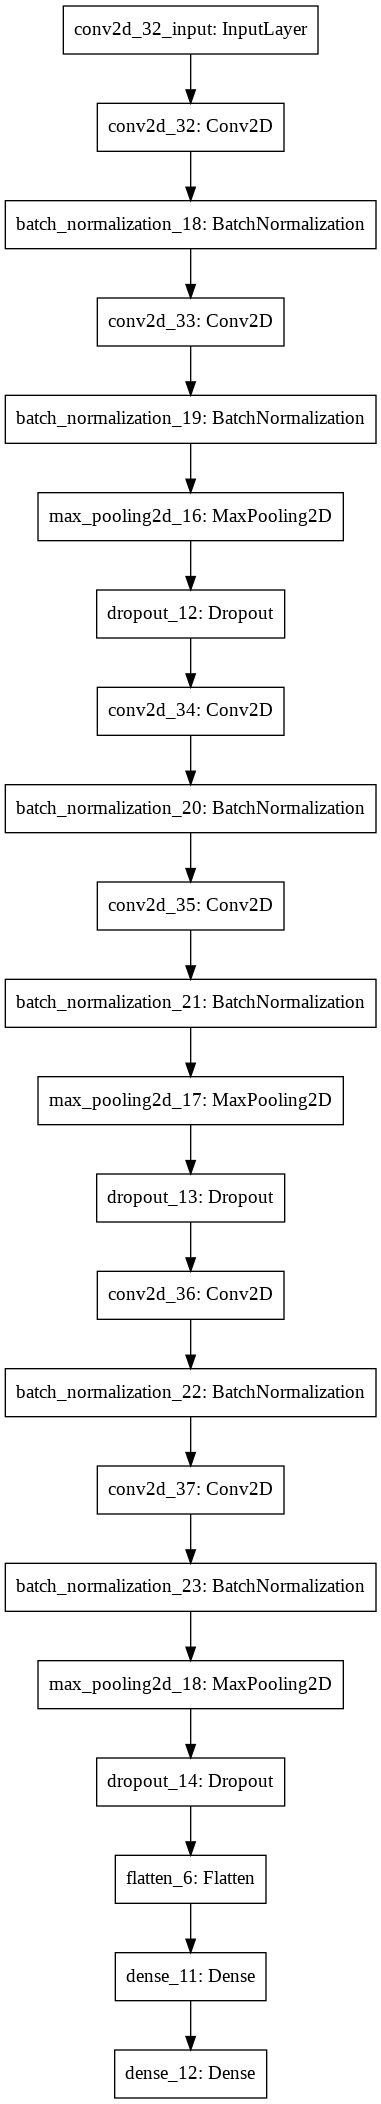

In [44]:
plot_model(model_5, to_file='model5.png')

Epoch 1/20
1484/1484 [==============================] - 27s 17ms/step - loss: 1.9637 - accuracy: 0.3203 - val_loss: 1.5979 - val_accuracy: 0.4560
Epoch 2/20
1484/1484 [==============================] - 25s 17ms/step - loss: 1.4461 - accuracy: 0.4860 - val_loss: 1.4627 - val_accuracy: 0.4816
Epoch 3/20
1484/1484 [==============================] - 25s 17ms/step - loss: 1.2822 - accuracy: 0.5528 - val_loss: 1.1541 - val_accuracy: 0.6108
Epoch 4/20
1484/1484 [==============================] - 25s 17ms/step - loss: 1.1613 - accuracy: 0.5979 - val_loss: 1.2632 - val_accuracy: 0.5820
Epoch 5/20
1484/1484 [==============================] - 26s 17ms/step - loss: 1.0836 - accuracy: 0.6266 - val_loss: 1.0756 - val_accuracy: 0.6424
Epoch 6/20
1484/1484 [==============================] - 26s 17ms/step - loss: 1.0138 - accuracy: 0.6539 - val_loss: 1.0163 - val_accuracy: 0.6672
Epoch 7/20
1484/1484 [==============================] - 26s 17ms/step - loss: 0.9643 - accuracy: 0.6729 - val_loss: 1.1087 -

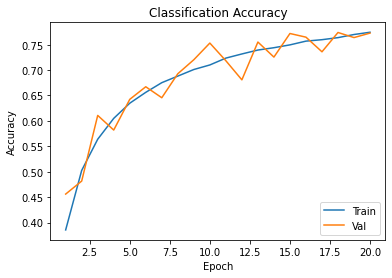

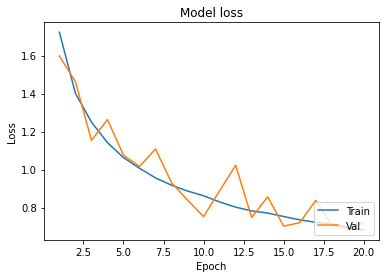

In [45]:
results(model_5)

result [[8.7235278e-01 8.9662237e-05 3.1100648e-02 5.6371978e-03 8.0063239e-02
  3.4234812e-03 7.7102747e-04 4.8006447e-03 1.4700239e-03 2.9126243e-04]] 
dict2 {0.8723528: 'airplane', 8.966224e-05: 'automobile', 0.031100648: 'bird', 0.0056371978: 'cat', 0.08006324: 'deer', 0.0034234812: 'dog', 0.00077102747: 'frog', 0.0048006447: 'horse', 0.0014700239: 'ship', 0.00029126243: 'truck'}
res [8.9662237e-05 2.9126243e-04 7.7102747e-04 1.4700239e-03 3.4234812e-03
 4.8006447e-03 5.6371978e-03 3.1100648e-02 8.0063239e-02 8.7235278e-01]
res [8.7235278e-01 8.0063239e-02 3.1100648e-02 5.6371978e-03 4.8006447e-03
 3.4234812e-03 1.4700239e-03 7.7102747e-04 2.9126243e-04 8.9662237e-05]
results [0.8723528  0.08006324 0.03110065]
Top predictions of these images are
airplane : 87.24
deer : 8.01
bird : 3.11
The image given as input is


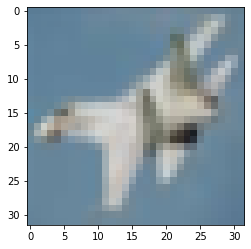

In [46]:
predict_class("test01.png" ,model_5)


```
# This is formatted as code
```

# Model Saving

In [48]:
model_5.save("model_5.h5")

# Inferencing

In [49]:
from tensorflow.keras.models import load_model

In [50]:
m = load_model("model_5.h5")

result [[9.70429480e-01 1.77810361e-04 2.34923903e-02 5.28018500e-05
  5.42305270e-03 1.00291554e-05 6.81645033e-05 1.97614456e-04
  1.07607855e-04 4.10684661e-05]] 
dict2 {0.9704295: 'airplane', 0.00017781036: 'automobile', 0.02349239: 'bird', 5.280185e-05: 'cat', 0.0054230527: 'deer', 1.0029155e-05: 'dog', 6.81645e-05: 'frog', 0.00019761446: 'horse', 0.000107607855: 'ship', 4.1068466e-05: 'truck'}
res [1.00291554e-05 4.10684661e-05 5.28018500e-05 6.81645033e-05
 1.07607855e-04 1.77810361e-04 1.97614456e-04 5.42305270e-03
 2.34923903e-02 9.70429480e-01]
res [9.70429480e-01 2.34923903e-02 5.42305270e-03 1.97614456e-04
 1.77810361e-04 1.07607855e-04 6.81645033e-05 5.28018500e-05
 4.10684661e-05 1.00291554e-05]
results [0.9704295  0.02349239 0.00542305]
Top predictions of these images are
airplane : 97.04
bird : 2.35
deer : 0.54
The image given as input is


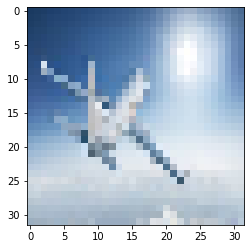

In [51]:
# unseen image 1
resource = '/content/unknown01.png'
predict_class(resource, m)

result [[5.4288566e-02 9.4097459e-01 8.0575279e-07 1.6444365e-06 5.4969996e-07
  7.0564802e-08 8.7347275e-05 6.1411720e-07 4.0406750e-05 4.6053044e-03]] 
dict2 {0.054288566: 'airplane', 0.9409746: 'automobile', 8.057528e-07: 'bird', 1.6444365e-06: 'cat', 5.4969996e-07: 'deer', 7.05648e-08: 'dog', 8.7347275e-05: 'frog', 6.141172e-07: 'horse', 4.040675e-05: 'ship', 0.0046053044: 'truck'}
res [7.0564802e-08 5.4969996e-07 6.1411720e-07 8.0575279e-07 1.6444365e-06
 4.0406750e-05 8.7347275e-05 4.6053044e-03 5.4288566e-02 9.4097459e-01]
res [9.4097459e-01 5.4288566e-02 4.6053044e-03 8.7347275e-05 4.0406750e-05
 1.6444365e-06 8.0575279e-07 6.1411720e-07 5.4969996e-07 7.0564802e-08]
results [0.9409746  0.05428857 0.0046053 ]
Top predictions of these images are
automobile : 94.1
airplane : 5.43
truck : 0.46
The image given as input is


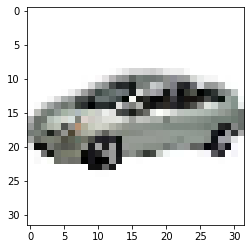

In [52]:
# unseen image 2
resource = '/content/unknown02.png'
predict_class(resource, m)

result [[9.6043814e-03 3.9858208e-03 9.2406648e-01 1.2861813e-02 1.7528048e-03
  1.1707469e-02 3.1043125e-02 1.7811914e-03 2.4628895e-04 2.9505556e-03]] 
dict2 {0.009604381: 'airplane', 0.003985821: 'automobile', 0.9240665: 'bird', 0.012861813: 'cat', 0.0017528048: 'deer', 0.011707469: 'dog', 0.031043125: 'frog', 0.0017811914: 'horse', 0.00024628895: 'ship', 0.0029505556: 'truck'}
res [2.4628895e-04 1.7528048e-03 1.7811914e-03 2.9505556e-03 3.9858208e-03
 9.6043814e-03 1.1707469e-02 1.2861813e-02 3.1043125e-02 9.2406648e-01]
res [9.2406648e-01 3.1043125e-02 1.2861813e-02 1.1707469e-02 9.6043814e-03
 3.9858208e-03 2.9505556e-03 1.7811914e-03 1.7528048e-03 2.4628895e-04]
results [0.9240665  0.03104313 0.01286181]
Top predictions of these images are
bird : 92.41
frog : 3.1
cat : 1.29
The image given as input is


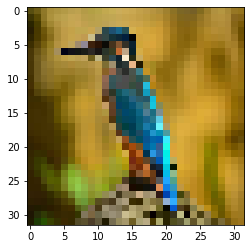

In [53]:
# unseen image 1
resource = '/content/unknown03.png'
predict_class(resource, m)